In [2]:
import numpy as np
import math
import pandas as pd
from matplotlib import pyplot as plt
from naloga import MaksimalnaEntropija, fourier_transform, okna, add_noise

plt.rcParams["figure.figsize"] = (15,5)
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Set2.colors)

## 1. Metoda maksimalne entropije

Metoda maksimalne entropije:

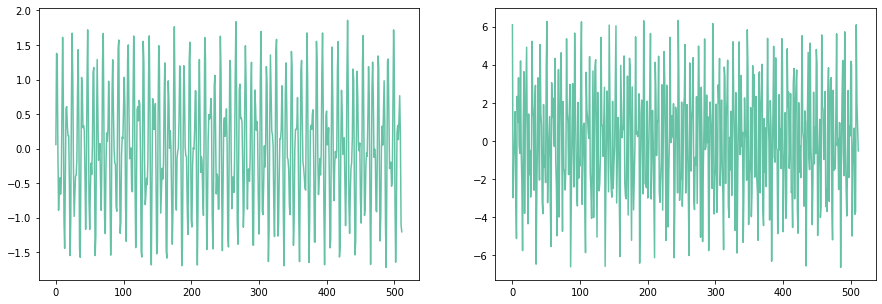

In [2]:
val2 = np.loadtxt("val2.dat")
val3 = np.loadtxt("val3.dat")
x2 = np.asarray(range(val2.size))
x3 = np.asarray(range(val3.size))

val2_mem = MaksimalnaEntropija(val2)
val3_mem = MaksimalnaEntropija(val3)

fig, ax = plt.subplots(1,2)

ax[0].plot(x2, val2)
ax[1].plot(x3, val3)

plt.show()

Primerjava Hanna fft in za gostoto 512 MEM pri različnih pjih

In [22]:
data2 = val2
data3 = val3
pis = [5, 10, 15, 20, 25]

df_2 = pd.DataFrame()
df_3 = pd.DataFrame()

for p in pis:
    PSD2 = val2_mem.eval_P(p, len(data2))
    PSD2 = PSD2[:len(PSD2)//2]

    PSD3 = val3_mem.eval_P(p, len(data3))
    PSD3 = PSD3[:len(PSD3)//2]

    omega2 = np.linspace(0, 0.5, PSD2.size)
    omega3 = np.linspace(0, 0.5, PSD3.size)
    
    df_2['$p={}$'.format(p)] = abs(PSD2)**2
    df_3['$p={}$'.format(p)] = abs(PSD3)**2

ft_val2 = fourier_transform(val2)
ft_val3 = fourier_transform(val3)

df_2['$\\text{FFT + Hann}$'] = ft_val2.MOC(okna.hann)
df_3['$\\text{FFT + Hann}$'] = ft_val3.MOC(okna.hann)

df_2.to_csv('1naloga/pji_2.txt', header=True, index=False, sep='\t', mode='w')
df_3.to_csv('1naloga/pji_3.txt', header=True, index=False, sep='\t', mode='w')

Primerjava fft in Hann z različnimi gostotami


In [24]:
data2 = val2
data3 = val3
n = [0.1, 0.25, 0.5, 1, 2, 10]
p = 15

nji2 = open('1naloga/Nji_2.txt', 'a')
nji3 = open('1naloga/Nji_3.txt', 'a')

for N in n[::-1]:
    PSD2 = val2_mem.eval_P(p, int(len(data2)*N))
    PSD2 = PSD2[:len(PSD2)//2]
    
    PSD3 = val3_mem.eval_P(p, int(len(data3)*N))
    PSD3 = PSD3[:len(PSD3)//2]

    omega2 = np.linspace(0, 0.5, PSD2.size)
    omega3 = np.linspace(0, 0.5, PSD3.size)

    df_2 = abs(PSD2)**2
    df_3 = abs(PSD3)**2
    print(N*len(val2), len(omega2))

    print('omega\t$N={}$'.format(int(N*len(val2))), file=nji2)
    print('omega\t$N={}$'.format(int(N*len(val3))), file=nji3)
    np.savetxt(nji2, np.vstack([omega2, df_2]).T, delimiter='\t', newline='\n')
    np.savetxt(nji3, np.vstack([omega2, df_3]).T, delimiter='\t', newline='\n')

    print('\n', file=nji2, flush='True')
    print('\n', file=nji3, flush='True')

P2 = ft_val2.MOC(okna.hann)
P3 = ft_val3.MOC(okna.hann)

omega2 = np.linspace(0, 0.5, P2.size)
omega3 = np.linspace(0, 0.5, P3.size)

print('omega\t$\\text{FFT + Hann}$', file=nji2)
print('omega\t$\\text{FFT + Hann}$', file=nji3)

np.savetxt(nji2, np.vstack([omega2, P2]).T, delimiter='\t', newline='\n')
np.savetxt(nji3, np.vstack([omega3, P3]).T, delimiter='\t', newline='\n')

print('\n', file=nji2, flush='True')
print('\n', file=nji3, flush='True')


5120 2560
1024 512
512 256
256.0 128
128.0 64
51.2 25


Letna količina CO2 v zraku

In [25]:
data = np.loadtxt("co2.dat")
data = np.delete(data, np.where(data[:,1]<0),0)
time, co2 = data[:,0], data[:,1]

# odstejem linearno narascanje podatkom
koef = np.polyfit(time, co2, 1)
CO2 = co2 - koef[0]*time - koef[1]


df_co2 = pd.DataFrame()

df_co2['čas'] = time
df_co2['co2'] = co2
df_co2['co2 - linearni$'] = CO2

df_co2.to_csv('1naloga/co2.txt', header=True, index=False, sep='\t', mode='w')

In [27]:
data = CO2
co2_mem = MaksimalnaEntropija(CO2)

df_CO2 = pd.DataFrame()

for p in pis:
    PSD = co2_mem.eval_P(p, len(data))
    PSD = PSD[:len(PSD)//2]

    omega = np.linspace(0, 0.5, PSD.size)

    df_CO2['$p={}$'.format(p)] = abs(PSD)**2

ft_co2 = fourier_transform(co2)
df_CO2['$\\text{FFT + Hann}$'] = ft_co2.MOC(okna.hann)

df_CO2.to_csv('1naloga/co2_p.txt', header=True, index=False, sep='\t', mode='w')

In [28]:

data = co2
n = [0.1, 0.25, 0.5, 1, 2, 10]
p = 15

nji = open('1naloga/co2_n.txt', 'a')

for N in n[::-1]:
    PSD = co2_mem.eval_P(p, int(len(data)*N))
    PSD = PSD[:len(PSD)//2]
    
    omega = np.linspace(0, 0.5, PSD.size)

    df_CO2 = abs(PSD)**2
    print(N*len(CO2), len(omega))

    print('omega\t$N={}$'.format(int(N*len(CO2))), file=nji)
    np.savetxt(nji, np.vstack([omega, df_CO2]).T, delimiter='\t', newline='\n')

    print('\n', file=nji, flush='True')

ft_co2 = fourier_transform(CO2)
P = ft_co2.MOC(okna.hann)

omega = np.linspace(0, 0.5, P.size)

print('omega\t$\\text{FFT + Hann}$', file=nji)

np.savetxt(nji, np.vstack([omega, P]).T, delimiter='\t', newline='\n')

print('\n', file=nji, flush='True')

6040 3020
1208 604
604 302
302.0 151
151.0 75
60.400000000000006 30


Kje ležijo poli znotraj enotske krožnice pri CO2

In [29]:
plt.rcParams["figure.figsize"] = (7,7)

pis = [5, 20, 100]
p = 200

# x = np.linspace(-1, 1, 1000)
# plt.plot(x, np.sqrt(1-x**2), "black")
# plt.plot(x, -np.sqrt(1-x**2), "black")

poli = open('1naloga/co2_poli.txt', 'a')

for p in pis:
    a_co2 = co2_mem.koeficienti_a(p)

    a_coef = a_co2[::-1]
    a_coef = np.append(a_coef, 1)

    zeros = np.roots(np.append(a_co2[::-1],1)[::-1])

    print('$p={}$'.format(p), file=poli)
    np.savetxt(poli, np.vstack([np.real(zeros), np.imag(zeros)]).T, delimiter='\t', newline='\n')
    print('\n', file=poli, flush='True')

Testni signal

In [73]:
# Number of samplepoints
N = 1000
# sample spacing
T = 1.0 / 10.0
x = np.linspace(0.0, N*T, N)

# y = np.sin(4.0 * np.pi*x) + np.sin(4.2*np.pi*x) + np.sin(4.4*np.pi*x)
y = np.sin(4*np.pi*x) + np.sin(4.1*np.pi*x) + np.sin(4.2*np.pi*x)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

yf = fourier_transform(y)
y_hann = yf.MOC(okna.hann)
y_bartlett = yf.MOC(okna.bartlett)
y_welch = yf.MOC(okna.welch)
y_eksp = yf.MOC(okna.eksponent)


sinus_df = pd.DataFrame()
sinus_df['$\omega'] = xf

mem_test = MaksimalnaEntropija(y)
sinus_df['FFT+Hann'] = 2.0/N * y_hann

pis = [20, 40, 60, 80]
for p in pis:
    PSD_TEST = mem_test.eval_P(p, len(y))
    PSD_TEST = PSD_TEST[:len(PSD_TEST)//2]

    sinus_df['$p={}$'.format(p)] = 2.0/N * np.abs(PSD_TEST)

# sinus_df.to_csv('1naloga/test_1.txt', header=True, index=False, sep='\t', mode='w')
sinus_df.to_csv('1naloga/test_2.txt', header=True, index=False, sep='\t', mode='w')

500 500
500 500
True


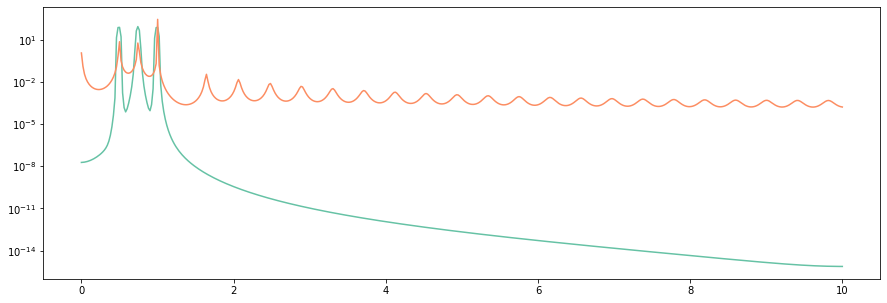

In [70]:
# Number of samplepoints
N = 1000
# sample spacing
T = 1.0 / 20.0
x = np.linspace(0.0, N*T, N)

y = np.sin(np.pi*x) + np.sin(1.5*np.pi*x) + np.sin(2.0*np.pi*x)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

yf = fourier_transform(y)
y_hann = yf.MOC(okna.hann)
y_bartlett = yf.MOC(okna.bartlett)
y_welch = yf.MOC(okna.welch)
y_eksp = yf.MOC(okna.eksponent)


p = 50
mem_test = MaksimalnaEntropija(y)
PSD_TEST = mem_test.eval_P(p, len(y))
PSD_TEST = PSD_TEST[:len(PSD_TEST)//2]
print(len(2.0/N * np.abs(PSD_TEST)), len(xf))
print(len(2.0/N * np.abs(PSD_TEST)), len(xf))
print(np.all(np.diff(xf) > 0))

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(y_hann[:N//2]))
# ax.plot(xf, 2.0/N * np.abs(y_bartlett[:N//2]))
# ax.plot(xf, 2.0/N * np.abs(y_welch[:N//2]))
# ax.plot(xf, 2.0/N * np.abs(y_eksp[:N//2]))
ax.plot(xf, 2.0/N * np.abs(PSD_TEST))
ax.set_yscale('log')
plt.show()

## 2. Linearna napoved

In [36]:
def lin_pred(data, p, aji, n=len(data)//2):
    signal = data[:n]

    for i in range(n):
        y = -np.sum(signal[:-p-1:-1]*aji)
        signal = np.hstack([signal, y])

    return signal

In [32]:
# data = np.loadtxt("val2.dat")
data = np.loadtxt("val3.dat")

data_mem = MaksimalnaEntropija(data)

pis = [5, 15]
# napoved = open('1naloga/napoved_val2.txt', 'a')
napoved = open('1naloga/napoved_val3.txt', 'a')

for p in pis:
    a_data = data_mem.koeficienti_a(p)

    nov_data = data_mem.lin_pred(p)
    nov_data[:256] = [np.nan]*256

    print('$p={}$'.format(p), file=napoved)
    np.savetxt(napoved, np.vstack([data, nov_data]).T, delimiter='\t', newline='\n')
    print("", file=napoved, flush=True)

### Preslikaj nicle znotraj enotske kroznice
p = 5
a_data = data_mem.koeficienti_a(p)

zeros = np.roots(np.append(a_data[::-1],1)[::-1])
fixed_zeros = data_mem.preslikaj(zeros, dies_out=True)
nicle5 = np.vstack([zeros, fixed_zeros])

new_a = np.poly(fixed_zeros)[1:]
nov_data = lin_pred(data, p, new_a)
nov_data[:256] = [np.nan]*256

print('$p={}$ popravljen'.format(p), file=napoved)
np.savetxt(napoved, np.vstack([data, nov_data]).T, delimiter='\t', newline='\n')
print("", file=napoved, flush=True)

p = 15
a_data = data_mem.koeficienti_a(p)

zeros = np.roots(np.append(a_data[::-1],1)[::-1])
fixed_zeros = data_mem.preslikaj(zeros, dies_out=True)
nicle15 = np.vstack([zeros, fixed_zeros])

new_a = np.poly(fixed_zeros)[1:]
nov_data = lin_pred(data, p, new_a)
nov_data[:256] = [np.nan]*256

print('$p={}$ popravljen'.format(p), file=napoved)
np.savetxt(napoved, np.vstack([data, nov_data]).T, delimiter='\t', newline='\n')
print("", file=napoved, flush=True)


In [24]:
plt.rcParams["figure.figsize"] = (7,7)

poli = open('1naloga/preslikava_val.txt', 'a')

for nicle in nicle5:
    p=5
    print('$p={}$'.format(p), file=poli)
    np.savetxt(poli, np.vstack([np.real(nicle), np.imag(nicle)]).T, delimiter='\t', newline='\n')
    print('\n', file=poli, flush='True')

for nicle in nicle15:
    p=15
    print('$p={}$'.format(p), file=poli)
    np.savetxt(poli, np.vstack([np.real(nicle), np.imag(nicle)]).T, delimiter='\t', newline='\n')
    print('\n', file=poli, flush='True')

preverimo kaj se dogaja z napako napovedi

In [26]:
napaka = open('1naloga/napake_val.txt', 'a')

val2_data = np.loadtxt("val2.dat")
val2_mem = MaksimalnaEntropija(val2_data)

val3_data = np.loadtxt("val3.dat")
val3_mem = MaksimalnaEntropija(val3_data)

p = 25
a_val2 = val2_mem.koeficienti_a(p)
a_val3 = val3_mem.koeficienti_a(p)

zeros = np.roots(np.append(a_val2[::-1],1)[::-1])
fixed_zeros_2 = val2_mem.preslikaj(zeros, dies_out=False)

zeros = np.roots(np.append(a_val3[::-1],1)[::-1])
fixed_zeros_3 = val2_mem.preslikaj(zeros, dies_out=False)

new_a_val2 = np.poly(fixed_zeros_2)[1:]
nov_val2_data = lin_pred(val2_data, p, new_a_val2)
nov_val2_data[:256] = [np.nan]*256

new_a_val3 = np.poly(fixed_zeros_3)[1:]
nov_val3_data = lin_pred(val2_data, p, new_a_val3)
nov_val3_data[:256] = [np.nan]*256

napaka2 = np.abs((nov_val2_data[256:512] - val2_data[256:512])/val2_data[256:512])
napaka2 = np.concatenate([[np.nan]*256, napaka2])
napaka3 = np.abs((nov_val3_data[256:512] - val3_data[256:512])/val3_data[256:512])
napaka3 = np.concatenate([[np.nan]*256, napaka3])

print('val2', file=napaka)
np.savetxt(napaka, np.vstack([val2_data, nov_val2_data, napaka2]).T, delimiter='\t', newline='\n')
print("", file=napaka, flush=True)
print('val3', file=napaka)
np.savetxt(napaka, np.vstack([val3_data, nov_val3_data, napaka3]).T, delimiter='\t', newline='\n')
print("", file=napaka, flush=True)


In [29]:
napaka = open('1naloga/napake_val_p.txt', 'a')

val2_data = np.loadtxt("val2.dat")
val2_mem = MaksimalnaEntropija(val2_data)

val3_data = np.loadtxt("val3.dat")
val3_mem = MaksimalnaEntropija(val3_data)

pis = np.asarray(range(1,21))

    
print("p\tval2\tval3", file=napaka)
for p in pis:
    a_val2 = val2_mem.koeficienti_a(p)
    a_val3 = val3_mem.koeficienti_a(p)

    zeros = np.roots(np.append(a_val2[::-1],1)[::-1])
    fixed_zeros_2 = val2_mem.preslikaj(zeros, dies_out=True)
    #fixed_zeros_2 = val2_mem.preslikaj(fixed_zeros_2, dies_out=False)

    zeros = np.roots(np.append(a_val3[::-1],1)[::-1])
    fixed_zeros_3 = val3_mem.preslikaj(zeros, dies_out=True)
    #fixed_zeros_3 = val3_mem.preslikaj(fixed_zeros_3, dies_out=False)

    new_a_val2 = np.poly(fixed_zeros_2)[1:]
    nov_val2_data = lin_pred(val2_data, p, new_a_val2)
    nov_val2_data[:256] = [np.nan]*256

    new_a_val3 = np.poly(fixed_zeros_3)[1:]
    nov_val3_data = lin_pred(val3_data, p, new_a_val3)
    nov_val3_data[:256] = [np.nan]*256

    napaka2 = np.sum(np.abs( (nov_val2_data[256:] - val2_data[256:]) / val2_data[256:]))
    napaka3 = np.sum(np.abs( (nov_val3_data[256:] - val3_data[256:]) / val3_data[256:]))

    np.savetxt(napaka, np.vstack([p, napaka2, napaka3]).T, delimiter='\t', newline='\n')
    print("", end="", flush=True, file=napaka)

Isto samo za CO2

In [63]:
data = np.loadtxt("co2.dat")
data = np.delete(data, np.where(data[:,1]<0),0)
time, co2 = data[:,0], data[:,1]

# odstejem linearno narascanje podatkom
koef = np.polyfit(time, co2, 1)
CO2 = co2 - koef[0]*time - koef[1]
N = int(len(CO2)/2)
print(N)

co2_mem = MaksimalnaEntropija(CO2)

pis = [10, 20, 30, 40] 
napoved = open('1naloga/napoved_co2.txt', 'a')
 
for p in pis:
    a_data = co2_mem.koeficienti_a(p)
    
    nov_data = co2_mem.lin_pred(p)
    nov_data[:N] = [np.nan]*N
    
    print('$p={}$'.format(p), file=napoved)
    np.savetxt(napoved, np.vstack([time, CO2, nov_data]).T, delimiter='\t', newline='\n')
    print("", file=napoved, flush=True)

302


In [ ]:
data = np.loadtxt("co2.dat")
data = np.delete(data, np.where(data[:,1]<0),0)
time, co2 = data[:,0], data[:,1]

# odstejem linearno narascanje podatkom
koef = np.polyfit(time, co2, 1)
CO2 = co2 - koef[0]*time - koef[1]
N = int(len(CO2)/2)
print(N)

co2_mem = MaksimalnaEntropija(CO2)

pis = [10, 20, 30, 40] 
napoved = open('1naloga/napoved_co2.txt', 'a')
 
for p in pis:
    a_data = co2_mem.koeficienti_a(p)
    
    nov_data = co2_mem.lin_pred(p)
    nov_data[:N] = [np.nan]*N
    
    print('$p={}$'.format(p), file=napoved)
    np.savetxt(napoved, np.vstack([time, CO2, nov_data]).T, delimiter='\t', newline='\n')
    print("", file=napoved, flush=True)

302


Podobno za Lunine efemeride, Wolfovo število in borzo

In [44]:
data = np.loadtxt("luna.dat", usecols=2)
N = len(data)//2
time = np.asarray(range(2*N))

half = data[:N]
luna_mem = MaksimalnaEntropija(half)

pis = [10, 20, 30, 40] 
napoved = open('1naloga/napoved_luna.txt', 'a')
 
for p in pis:
    a_data = luna_mem.koeficienti_a(p)

    n = N 
    nov_data = luna_mem.lin_pred(p)
    nov_data[:N] = [np.nan]*N

    zeros = np.roots(np.append(a_data[::-1],1)[::-1])
    fixed_zeros = luna_mem.preslikaj(zeros, dies_out=False)

    new_a = np.poly(fixed_zeros)[1:]
    nov_data = lin_pred(half, p, new_a)
    nov_data[:N] = [np.nan]*N

    napaka = np.abs((nov_data[N:] - data[N:])/data[N:])
    napaka = np.concatenate([[np.nan]*N, napaka])

    print('$p={}$'.format(p), file=napoved)
    np.savetxt(napoved, np.vstack([time, data, nov_data]).T, delimiter='\t', newline='\n')
    print("", file=napoved, flush=True)

In [5]:
def lin_pred(signal, p, aji, M):
    n = signal.size

    for i in range(M):
        y = -np.sum(signal[:-p-1:-1]*aji)
        signal = np.hstack([signal, y])

    return signal

Luna

In [67]:
data = np.loadtxt("luna.dat", usecols=2)

p = 55
napoved = open('1naloga/napoved_luna.txt', 'a')
 
time = np.asarray(range(len(data)))

n = 50/100
N = int(n*len(data))
print(N)

half = data[:N]
luna_mem = MaksimalnaEntropija(half)

a_data = luna_mem.koeficienti_a(p)

zeros = np.roots(np.append(a_data[::-1],1)[::-1])
fixed_zeros = luna_mem.preslikaj(zeros, dies_out=False)

M = len(data) - N
new_a = np.poly(fixed_zeros)[1:]
nov_data = lin_pred(half, p, new_a, M)
nov_data[:N] = [np.nan]*N
print(len(nov_data)/len(half), len(half), n, N, len(data), len(nov_data), len(time))

print('$p={}$ popravljen'.format(p), file=napoved)
np.savetxt(napoved, np.vstack([time, data, nov_data]).T, delimiter='\t', newline='\n')
print("", file=napoved, flush=True)

1096
2.0 1096 0.5 1096 2192 2192 2192


In [74]:
data = np.loadtxt("luna.dat", usecols=2)

p = 55
napoved = open('1naloga/napaka_luna.txt', 'a')
 
time = np.asarray(range(len(data)))

n = 50/100
N = int(n*len(data))
M = len(data) - N

half = data[:N]
luna_mem = MaksimalnaEntropija(data)

pis = np.asarray(range(10,40))
for p in pis:
    a_data = luna_mem.koeficienti_a(p)

    zeros = np.roots(np.append(a_data[::-1],1)[::-1])
    fixed_zeros = luna_mem.preslikaj(zeros, dies_out=False)

    new_a = np.poly(fixed_zeros)[1:]
    nov_data = lin_pred(half, p, new_a, M)
    nov_data[:N] = [np.nan]*N

    napaka = sum(np.abs((nov_data[N:] - data[N:])/data[N:]))

    print(p, '\t', napaka, file=napoved, flush=True)

Sončne pege -- totalen drek --> import knjižnice, ki to lepše nardi

In [82]:
from statsmodels.tsa.ar_model import AutoReg

In [103]:
data = np.loadtxt("Wolf_number.dat", usecols=2)

napoved = open('1naloga/napoved_wolf.txt', 'a')
 
time = np.asarray(range(len(data)))

p = 200

n = 0.5
N = int(len(data)*n)

model = AutoReg(data[:N], lags=p)
model_fit = model.fit()
coef = model_fit.params

predictions = model_fit.predict(start=N, end=len(data)-1, dynamic=False)
predictions = np.concatenate(([np.nan]*(len(data)-N-1), predictions))

print('$p={}$'.format(p), file=napoved)
np.savetxt(napoved, np.vstack([time, data, predictions]).T, delimiter='\t', newline='\n')
print("", file=napoved, flush=True)

Borza

In [116]:
data = np.loadtxt("borza.dat")
napoved = open('1naloga/napoved_borza.txt', 'a')
 
time = np.asarray(range(len(data)))

n = 1/2
N = int(n*len(data))

half = data[:N]
borza_mem = MaksimalnaEntropija(half)

p = 55
a_data = luna_mem.koeficienti_a(p)

zeros = np.roots(np.append(a_data[::-1],1)[::-1])
fixed_zeros = borza_mem.preslikaj(zeros, dies_out=True)

M = len(data) - N
new_a = np.poly(fixed_zeros)[1:]
nov_data = lin_pred(half, p, new_a, M)
nov_data[:N] = [np.nan]*N
print(len(nov_data)/len(half), len(half), n, N, len(data), len(nov_data), len(time))

print('$p={}$ popravljen'.format(p), file=napoved)
np.savetxt(napoved, np.vstack([time, data, nov_data]).T, delimiter='\t', newline='\n')
print("", file=napoved, flush=True)

2.0028248587570623 354 0.5 354 709 709 709


Dodatek šuma na linearno napoved

In [29]:
data = np.loadtxt("val3.dat")
noise = open('1naloga/zasumljeno.txt', 'a')

p, n = 50, 0.5
N = int(n*len(data))

sigma = [0, 0.5, 1, 5]

for s in sigma:
    new_data = np.copy(data)
    new_data = add_noise(new_data, 0, s)

    half = new_data[:N]
    data_mem = MaksimalnaEntropija(half)

    a_data = data_mem.koeficienti_a(p)

    zeros = np.roots(np.append(a_data[::-1],1)[::-1])
    fixed_zeros = data_mem.preslikaj(zeros, dies_out=False)

    M = len(data) - N
    new_a = np.poly(fixed_zeros)[1:]
    nov_data = lin_pred(half, p, new_a, M)
    nov_data[:N] = [np.nan]*N

    print('$\sigma={}$'.format(s), file=noise, flush=True)
    np.savetxt(noise, np.vstack([data, nov_data]).T, delimiter='\t', newline='\n')
    print("", file=noise, flush=True)